In [17]:
import yfinance as yf

tickers = ['AAPL', 'MSFT', 'GOOGL','NVDA','TSLA','AMZN']
data = yf.download(tickers, start='2015-01-01', end='2024-06-30')
data.head()

[*********************100%%**********************]  6 of 6 completed


Price       Adj Close                                                      \
Ticker           AAPL     AMZN      GOOGL       MSFT      NVDA       TSLA   
Date                                                                        
2015-01-02  24.402168  15.4260  26.447147  40.305370  0.483218  14.620667   
2015-01-05  23.714724  15.1095  25.943224  39.934731  0.475057  14.006000   
2015-01-06  23.716957  14.7645  25.302961  39.348606  0.460654  14.085333   
2015-01-07  24.049524  14.9210  25.228544  39.848541  0.459453  14.063333   
2015-01-08  24.973551  15.0230  25.316446  41.020802  0.476737  14.041333   

Price           Close                                 ...       Open  \
Ticker           AAPL     AMZN      GOOGL       MSFT  ...      GOOGL   
Date                                                  ...              
2015-01-02  27.332500  15.4260  26.477501  46.759998  ...  26.629999   
2015-01-05  26.562500  15.1095  25.973000  46.330002  ...  26.357500   
2015-01-06  26.565001  14.7645  25.332001  45.650002  ...  26.025000   
2015-01-07  26.937500  14.9210  25.257500  46.230000  ...  25.547501   
2015-01-08  27.972500  15.0230  25.345501  47.590000  ...  25.075500   

Price                                         Volume                      \
Ticker           MSFT     NVDA       TSLA       AAPL      AMZN     GOOGL   
Date                                                                       
2015-01-02  46.660000  0.50325  14.858000  212818400  55664000  26480000   
2015-01-05  46.369999  0.50325  14.303333  257142000  55484000  41182000   
2015-01-06  46.380001  0.49550  14.004000  263188400  70380000  54456000   
2015-01-07  45.980000  0.48325  14.223333  160423600  52806000  46918000   
2015-01-08  46.750000  0.48400  14.187333  237458000  61768000  73054000   

Price                                      
Ticker          MSFT       NVDA      TSLA  
Date                                       
2015-01-02  27913900  113680000  71466000  
2015-01-05  39673900  197952000  80527500  
2015-01-06  36447900  197764000  93928500  
2015-01-07  29114100  321808000  44526000  
2015-01-08  29645200  283780000  51637500  

[5 rows x 36 columns]

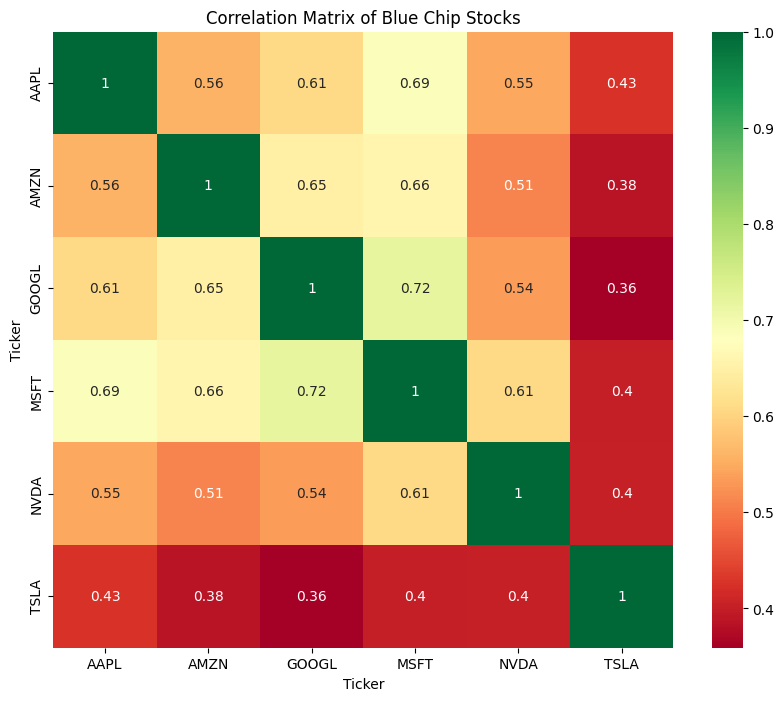

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

returns = data['Adj Close'].pct_change().dropna()
correlation_matrix = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix of Blue Chip Stocks')
plt.show()


In [14]:
#Calculate moving averages and volatility for each stock

for ticker in tickers:
    data[ticker, 'MA50'] = data['Adj Close'][ticker].rolling(window=50).mean()
    data[ticker, 'Volatility'] = data['Adj Close'][ticker].pct_change().rolling(window=50).std()

# To avoid a MultiIndex error, it's better to create separate DataFrames for each calculation and then merge them
ma50_df = pd.DataFrame({ticker: data['Adj Close'][ticker].rolling(window=50).mean() for ticker in tickers})
volatility_df = pd.DataFrame({ticker: data['Adj Close'][ticker].pct_change().rolling(window=50).std() for ticker in tickers})

# Adding the new data back to the original DataFrame
df = pd.concat([data, ma50_df.add_suffix('_MA50'), volatility_df.add_suffix('_Volatility')], axis=1)
print(df.head())


            (Adj Close, AAPL)  (Adj Close, AMZN)  (Adj Close, GOOGL)  \
Date                                                                   
2015-01-02          24.402170            15.4260           26.447147   
2015-01-05          23.714724            15.1095           25.943224   
2015-01-06          23.716955            14.7645           25.302961   
2015-01-07          24.049526            14.9210           25.228544   
2015-01-08          24.973558            15.0230           25.316446   

            (Adj Close, MSFT)  (Adj Close, NVDA)  (Adj Close, TSLA)  \
Date                                                                  
2015-01-02          40.305367           0.483218          14.620667   
2015-01-05          39.934723           0.475056          14.006000   
2015-01-06          39.348591           0.460654          14.085333   
2015-01-07          39.848526           0.459453          14.063333   
2015-01-08          41.020790           0.476737          14.041333  